In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("winequality-red.csv")
data.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6


In [3]:
data.shape

(1599, 12)

In [4]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
import seaborn as sn 

In [7]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

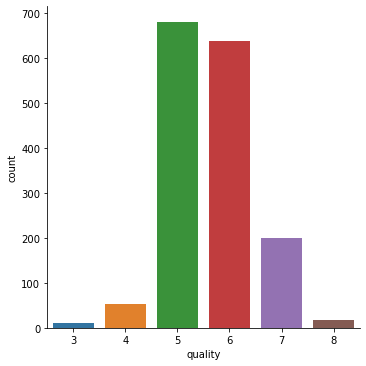

In [8]:
sn.catplot(x='quality', data=data , kind='count')

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

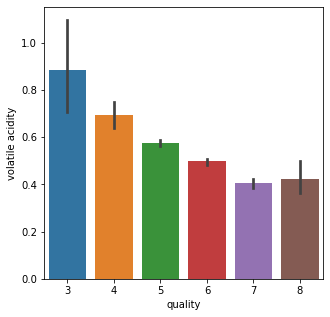

In [9]:
plt.figure(figsize=(5,5))
sn.barplot(x='quality',y='volatile acidity',data=data)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

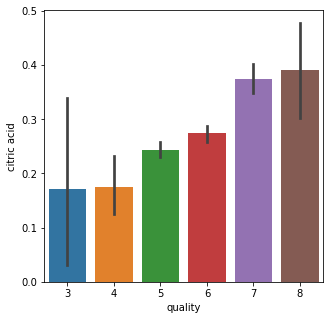

In [10]:
plt.figure(figsize=(5,5))
sn.barplot(x='quality',y='citric acid',data=data)

In [11]:
correlation = data.corr()

<AxesSubplot:>

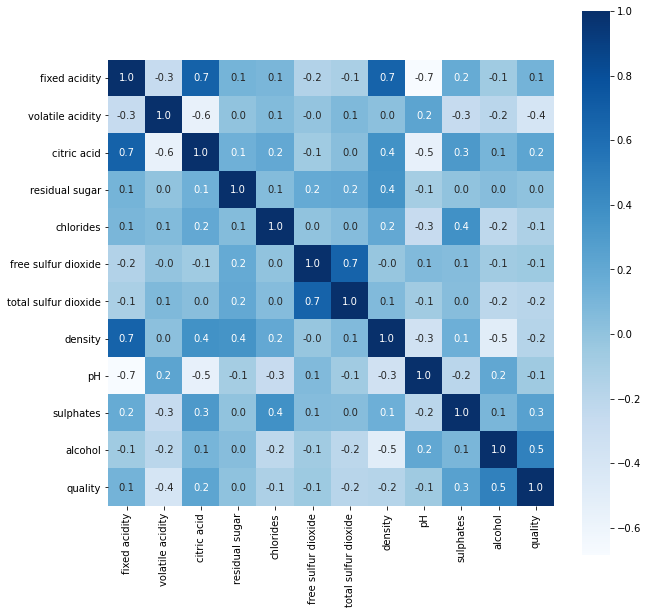

In [12]:
plt.figure(figsize=(10,10))
sn.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':10},cmap='Blues')

# now lets Start Preprocessing the data 

In [13]:
data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [14]:
x=data.drop('quality',axis=1)
y = data['quality'].apply(lambda yvalue: 1 if yvalue>=7 else 0)

In [15]:
print(x.shape)
print(y.shape)

(1599, 11)
(1599,)


# Train & test the data using Train test split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)

In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


# training the model

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
model = RandomForestClassifier()

In [21]:
model.fit(x_train,y_train)

RandomForestClassifier()

# Model Evaluation 

# checking accuracy score as it is a classifier model

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
x_pred = model.predict(x_test)
test_accuracy = accuracy_score(x_pred,y_test)

In [24]:
print(test_accuracy)

0.921875


In [25]:
xtrain_prediction = model.predict(x_train)
train_accuracy = accuracy_score(xtrain_prediction,y_train)

In [26]:
print(train_accuracy)

1.0


# Building the predictive model

In [27]:
input =(7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4)
inputdata = np.asarray(input)

inputdata_reshaped = inputdata.reshape(1,-1)

prediction = model.predict(inputdata_reshaped)

print(prediction)

if(prediction[0]==1):
    print('Good Quality Wine have a Drink')
else:
    print('Dont Buy Bad Quality Wine')    

[0]
Dont Buy Bad Quality Wine


In [29]:
import pickle

pickle.dump(model,open('model.sav','wb'))

In [30]:
loaded_model = pickle.load(open('model.sav','rb'))

In [31]:
input =(7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4)
inputdata = np.asarray(input)

inputdata_reshaped = inputdata.reshape(1,-1)

prediction = model.predict(inputdata_reshaped)

print(prediction)

if(prediction[0]==1):
    print('Good Quality Wine have a Drink')
else:
    print('Dont Buy Bad Quality Wine')    

[0]
Dont Buy Bad Quality Wine
